In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import f_oneway

# Comparison of Wine Reviews
## Yordan Darakchiev

In [3]:
food_data = pd.read_table("data/food-facts.tsv", low_memory = False)

In [4]:
food_data.shape

(356027, 163)

In [5]:
for column in food_data.columns:
    print(column)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
generic_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_en
origins
origins_tags
manufacturing_places
manufacturing_places_tags
labels
labels_tags
labels_en
emb_codes
emb_codes_tags
first_packaging_code_geo
cities
cities_tags
purchase_places
stores
countries
countries_tags
countries_en
ingredients_text
allergens
allergens_en
traces
traces_tags
traces_en
serving_size
no_nutriments
additives_n
additives
additives_tags
additives_en
ingredients_from_palm_oil_n
ingredients_from_palm_oil
ingredients_from_palm_oil_tags
ingredients_that_may_be_from_palm_oil_n
ingredients_that_may_be_from_palm_oil
ingredients_that_may_be_from_palm_oil_tags
nutrition_grade_uk
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states
states_tags
states_en
main_category
main_category_en
image_url
image_small_url
energy_100g
energy-from-fat_100g
fat_100g
saturated-fat_100g
-buty

In [6]:
wine_reviews = pd.read_csv("data/winemag-data.csv", index_col = 0)

In [7]:
wine_reviews.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [8]:
wine_reviews.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

In [9]:
wine_reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
points,129971.0,88.447138,3.039730,80.0,86.0,88.0,91.0,100.0
price,120975.0,35.363389,41.022218,4.0,17.0,25.0,42.0,3300.0


In [10]:
wine_reviews[wine_reviews.price.isna()]

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
30,France,Red cherry fruit comes laced with light tannin...,Nouveau,86,NaN,Beaujolais,Beaujolais-Villages,NaN,Roger Voss,@vossroger,Domaine de la Madone 2012 Nouveau (Beaujolais...,Gamay,Domaine de la Madone
31,Italy,Merlot and Nero d'Avola form the base for this...,Calanìca Nero d'Avola-Merlot,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2010 Calanìca Nero d'Avola-...,Red Blend,Duca di Salaparuta
32,Italy,"Part of the extended Calanìca series, this Gri...",Calanìca Grillo-Viognier,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2011 Calanìca Grillo-Viogni...,White Blend,Duca di Salaparuta
50,Italy,This blend of Nero d'Avola and Syrah opens wit...,Scialo,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Viticultori Associati Canicatti 2008 Scialo Re...,Red Blend,Viticultori Associati Canicatti
54,Italy,"A blend of Nero d'Avola and Nerello Mascalese,...",Rosso,85,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Corvo 2010 Rosso Red (Sicilia),Red Blend,Corvo
79,Portugal,"Grown on the sandy soil of Tejo, the wine is t...",Bridão,86,NaN,Tejo,NaN,NaN,Roger Voss,@vossroger,Adega Cooperativa do Cartaxo 2014 Bridão Touri...,Touriga Nacional,Adega Cooperativa do Cartaxo
137,South Africa,"This is great Chenin Blanc, wood fermented but...",Hope Marguerite,90,NaN,Walker Bay,NaN,NaN,Roger Voss,@vossroger,Beaumont 2005 Hope Marguerite Chenin Blanc (Wa...,Chenin Blanc,Beaumont
159,Italy,"Intense aromas of ripe red berry, menthol, esp...",Filo di Seta,91,NaN,Tuscany,Brunello di Montalcino,NaN,Kerin O’Keefe,@kerinokeefe,Castello Romitorio 2011 Filo di Seta (Brunell...,Sangiovese,Castello Romitorio


In [11]:
wines_with_known_prices = wine_reviews[~wine_reviews.price.isna()]

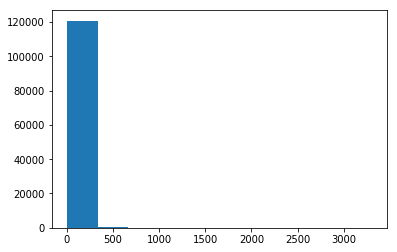

In [12]:
plt.hist(wines_with_known_prices.price)
plt.show()

In [13]:
wines_with_known_prices.price.skew()

18.000957415874353

In [14]:
expensive_wines = wines_with_known_prices[wines_with_known_prices.price > 1000].sort_values("price")

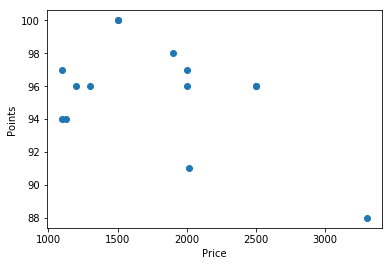

In [15]:
plt.scatter(expensive_wines.price, expensive_wines.points)
plt.xlabel("Price")
plt.ylabel("Points")
plt.show()

In [16]:
expensive_wines.corr()

,points,price
points,1.000000,-0.479097
price,-0.479097,1.000000


In [17]:
expensive_wines[expensive_wines.price < 3000].corr()

,points,price
points,1.000000,-0.042577
price,-0.042577,1.000000


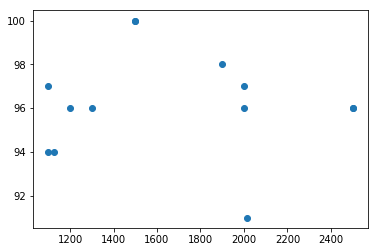

In [18]:
plt.scatter(expensive_wines[expensive_wines.price < 3000].price, expensive_wines[expensive_wines.price < 3000].points)

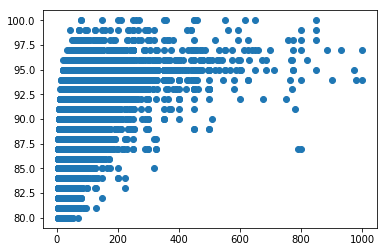

In [19]:
less_expensive_wines = wines_with_known_prices[wines_with_known_prices.price <= 1000]
plt.scatter(less_expensive_wines.price, less_expensive_wines.points)
plt.show()

In [20]:
less_expensive_wines.corr()

,points,price
points,1.000000,0.464732
price,0.464732,1.000000


In [21]:
least_expensive_wines = less_expensive_wines[less_expensive_wines.price <= 100]

In [22]:
len(least_expensive_wines)

117609

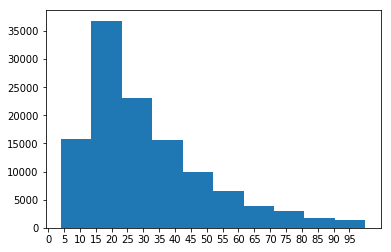

In [23]:
plt.hist(least_expensive_wines.price, bins = 10)
plt.xticks(range(0, 100, 5))
plt.show()

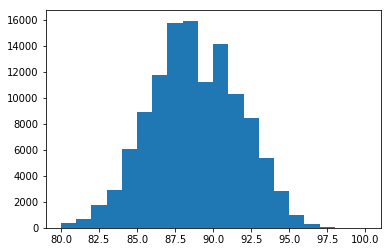

In [24]:
plt.hist(least_expensive_wines.points, bins = 20)
plt.show()

In [25]:
least_expensive_wines.points.describe()

count    117609.000000
mean         88.295989
std           2.960125
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


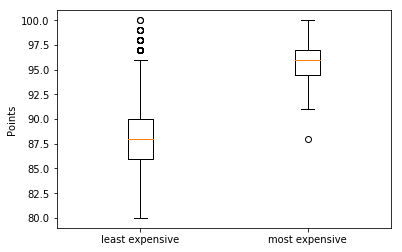

In [26]:
plt.boxplot([least_expensive_wines.points, expensive_wines.points], labels = ["least expensive", "most expensive"])
plt.ylabel("Points")
plt.show()

In [27]:
f_oneway(less_expensive_wines.points, expensive_wines.points)

F_onewayResult(statistic=78.81614917154018, pvalue=6.907026137761888e-19)

In [28]:
lowest_priced_wines = wines_with_known_prices.nsmallest(15, "price")

In [29]:
highest_priced_wines = wines_with_known_prices.nlargest(15, "price")

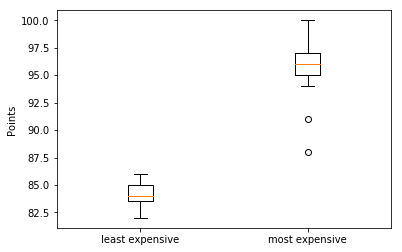

In [30]:
plt.boxplot([lowest_priced_wines.points, highest_priced_wines.points], labels = ["least expensive", "most expensive"])
plt.ylabel("Points")
plt.show()

In [31]:
f_oneway(lowest_priced_wines.points, highest_priced_wines.points)

F_onewayResult(statistic=179.83090128755384, pvalue=1.0374097787020597e-13)

In [32]:
wine_reviews.groupby("country").count().description.sort_values(ascending = False)

country
US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14


In [33]:
wines_by_country = wine_reviews.groupby("country")
for country, wines in wines_by_taster:
    if len(wines) > 30:
        print(country, round(wines.points.mean() - wines.points.std(), 2), round(wines.points.mean() + wines.points.std(), 2))

NameError: name 'wines_by_taster' is not defined

In [34]:
wines_by_taster = wine_reviews.groupby("taster_name")
for taster_name, wines in wines_by_taster:
    print(taster_name, round(wines.points.mean(), 2))

Alexander Peartree 85.86
Anna Lee C. Iijima 88.42
Anne Krebiehl MW 90.56
Carrie Dykes 86.4
Christina Pickard 87.83
Fiona Adams 86.89
Jeff Jenssen 88.32
Jim Gordon 88.63
Joe Czerwinski 88.54
Kerin O’Keefe 88.87
Lauren Buzzeo 87.74
Matt Kettmann 90.01
Michael Schachner 86.91
Mike DeSimone 89.1
Paul Gregutt 89.08
Roger Voss 88.71
Sean P. Sullivan 88.76
Susan Kostrzewa 86.61
Virginie Boone 89.21


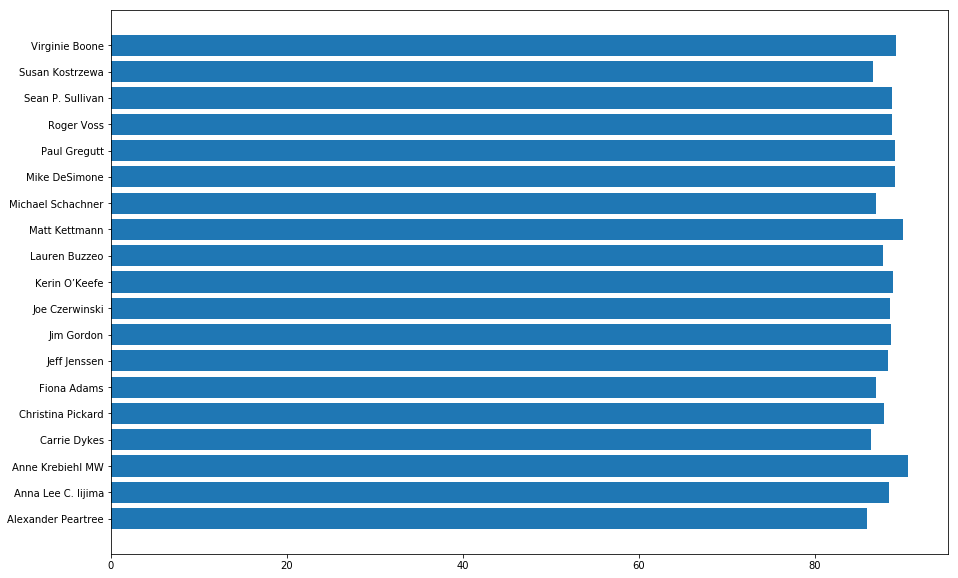

In [36]:
plt.figure(figsize = (15, 10))
plt.barh(wines_by_taster.points.mean().index, wines_by_taster.points.mean())
plt.show()

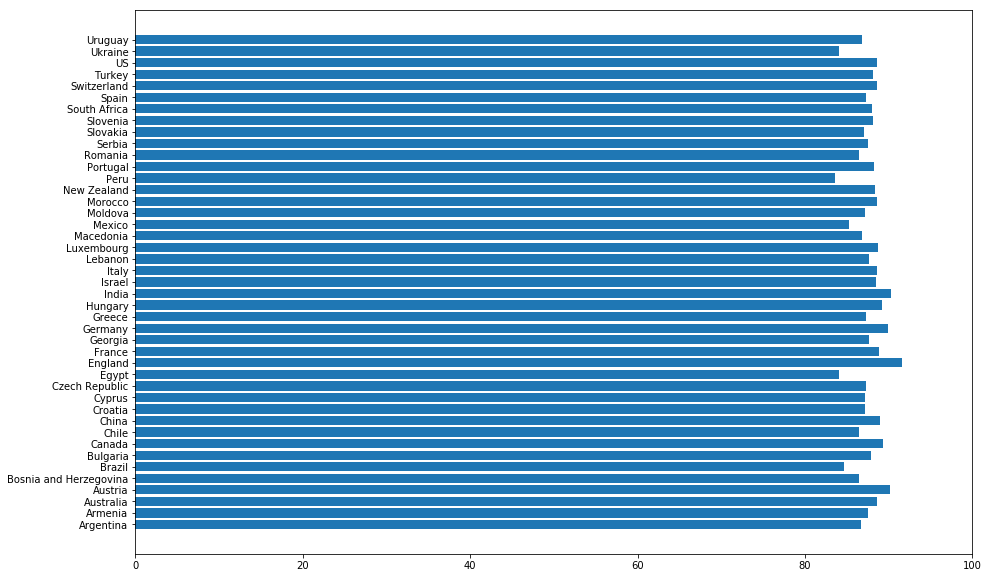

In [37]:
plt.figure(figsize = (15, 10))
plt.barh(wines_by_country.points.mean().index, wines_by_country.points.mean())
plt.xlim(0, 100)
plt.show()

In [38]:
for country, wines in wines_by_country:
    if len(wines) > 1000:
        country_points = wines.sample(100).points.mean()
        print(country, country_points)

Argentina 86.94
Australia 88.07
Austria 90.44
Chile 87.11
France 89.07
Germany 89.89
Italy 88.34
New Zealand 88.18
Portugal 88.41
South Africa 87.65
Spain 87.64
US 88.36


In [120]:
varieties, mean_points_by_variety = [], []
for variety, wines in wine_reviews.groupby("variety"):
    if len(wines) > 1000:
        print(variety, round(wines.points.mean(), 2))
        varieties.append(variety)
        mean_points_by_variety.append(wines.points.mean())

Bordeaux-style Red Blend 89.11
Bordeaux-style White Blend 88.69
Cabernet Franc 88.15
Cabernet Sauvignon 88.61
Champagne Blend 89.66
Chardonnay 88.34
Gamay 88.03
Gewürztraminer 88.59
Grüner Veltliner 89.98
Malbec 87.98
Merlot 87.21
Nebbiolo 90.25
Pinot Grigio 86.24
Pinot Gris 88.5
Pinot Noir 89.41
Portuguese Red 88.81
Portuguese White 86.93
Red Blend 88.38
Rhône-style Red Blend 89.15
Riesling 89.45
Rosé 86.85
Sangiovese 88.55
Sauvignon Blanc 87.43
Sparkling Blend 88.05
Syrah 89.29
Tempranillo 87.51
White Blend 87.35
Zinfandel 87.83


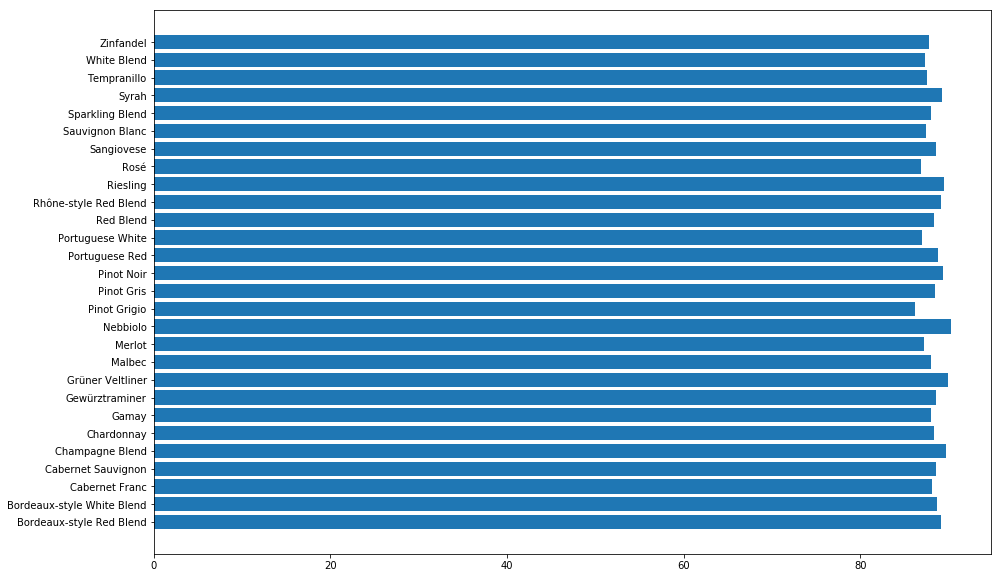

In [40]:
plt.figure(figsize = (15, 10))
plt.barh(varieties, mean_points_by_variety)
plt.show()

In [41]:
np.array(mean_points_by_variety).std()

0.9664765081096969

In [42]:
varieties_rare, mean_points_by_variety_rare = [], []
for variety, wines in wine_reviews.groupby("variety"):
    if len(wines) >= 50 and len(wines) <= 100:
        print(variety, round(wines.points.mean(), 2))
        varieties_rare.append(variety)
        mean_points_by_variety_rare.append(wines.points.mean())

Agiorgitiko 87.03
Alicante Bouschet 89.36
Alsace white blend 90.24
Arinto 87.12
Arneis 87.29
Austrian Red Blend 89.52
Austrian white blend 90.31
Cabernet Blend 88.5
Carignan 88.95
Cortese 86.45
Falanghina 87.27
Fumé Blanc 87.96
Furmint 89.8
Godello 86.91
Grenache-Syrah 88.58
Gros and Petit Manseng 89.71
Lagrein 88.58
Lambrusco 84.72
Malbec-Cabernet Sauvignon 88.45
Malbec-Merlot 88.23
Marsanne 88.14
Moscatel 88.3
Negroamaro 86.78
Pecorino 87.2
Petit Manseng 89.79
Portuguese Sparkling 86.08
Provence red blend 89.95
Ribolla Gialla 87.6
Rosado 84.77
Sauvignon Blanc-Semillon 88.16
Semillon-Sauvignon Blanc 88.47
Sherry 89.82
Spätburgunder 90.03
St. Laurent 89.73
Sylvaner 88.26
Syrah-Grenache 88.71
Tempranillo-Cabernet Sauvignon 86.64
Tinto Fino 89.88
Trebbiano 87.16
Verdelho 87.26
Vidal Blanc 87.02


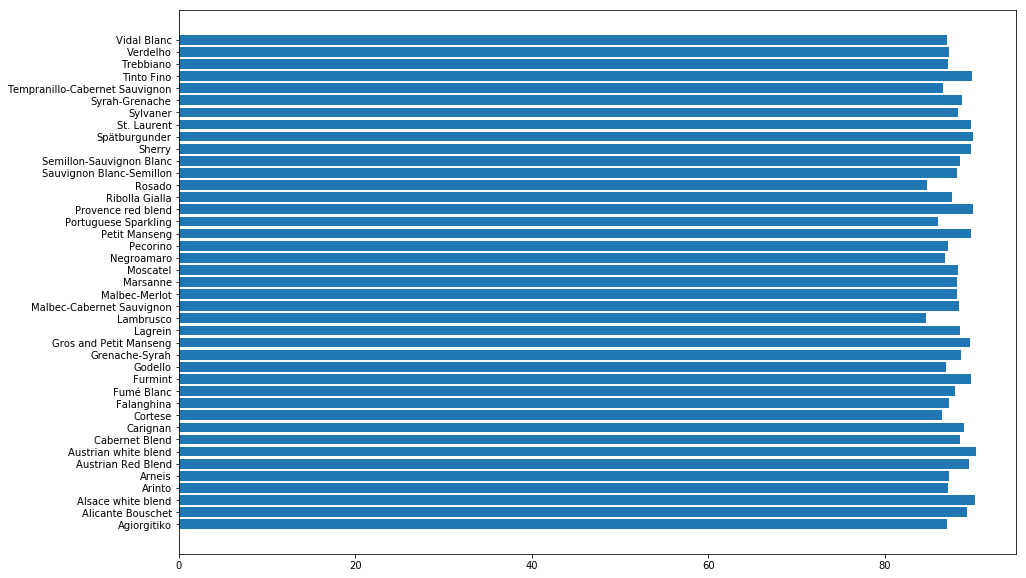

In [43]:
plt.figure(figsize = (15, 10))
plt.barh(varieties_rare, mean_points_by_variety_rare)
plt.show()

In [44]:
mean_points_by_variety = np.array(mean_points_by_variety)
print(mean_points_by_variety.min(), mean_points_by_variety.max())
print(np.array(mean_points_by_variety).std())

86.23764258555133 90.25106990014265
0.9664765081096969


In [45]:
mean_points_by_variety_rare = np.array(mean_points_by_variety_rare)
print(mean_points_by_variety_rare.min(), mean_points_by_variety_rare.max())
print(np.array(mean_points_by_variety_rare).std())

84.72 90.3125
1.4065532263748433


In [124]:
wines = food_data[food_data["categories_en"].str.contains("wine|Wine") == True]

In [126]:
wines.product_name.str.lower().dropna()

199                            côtes du rhône villages 2014
13955                       cabernet sauvignon 2012 vintage
14338                                                merlot
15370                                     vintage brut cava
15738                         zinfandel trinity county 2009
20112                                               grifone
27429                               beaujolais nouveau 2014
77326     arogant frog cabernet sauvignon merlot wine li...
85959                                               margaux
101434                             bogle cabernet sauvignon
101536                   jfj california champagne extra dry
101967                       gnarly head cabernet sauvignon
102115                                 casillero del diablo
102898                     korbel california champagne brut
103013                         gallo family, zinfandel 2011
103014                              cabernet sauvignon 2012
103015                                  

In [138]:
popular_varieties = [v.lower() for v in varieties]

In [139]:
popular_varieties

['bordeaux-style red blend',
 'bordeaux-style white blend',
 'cabernet franc',
 'cabernet sauvignon',
 'champagne blend',
 'chardonnay',
 'gamay',
 'gewürztraminer',
 'grüner veltliner',
 'malbec',
 'merlot',
 'nebbiolo',
 'pinot grigio',
 'pinot gris',
 'pinot noir',
 'portuguese red',
 'portuguese white',
 'red blend',
 'rhône-style red blend',
 'riesling',
 'rosé',
 'sangiovese',
 'sauvignon blanc',
 'sparkling blend',
 'syrah',
 'tempranillo',
 'white blend',
 'zinfandel']

In [145]:
wines.product_name.fillna("", inplace = True)

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [164]:
popular_wines_by_variety = {}

In [165]:
for variety in popular_varieties:
    if not variety in popular_wines_by_variety:
        popular_wines_by_variety[variety] = []

In [168]:
popular_wines_by_variety

{'bordeaux-style red blend': [],
 'bordeaux-style white blend': [],
 'cabernet franc': ['3569760000400'],
 'cabernet sauvignon': ['0017444000701',
  '0071570016852',
  '0080887493966',
  '0082242290432',
  '0085000005002',
  '01554823',
  '20580599',
  '3186127786267',
  '3222473443505',
  '3245414653917',
  '3263286325886',
  '3263857533511',
  '6938818501836',
  '7350062350241',
  '7804320753607',
  '8410261206165',
  '9313181002185'],
 'champagne blend': [],
 'chardonnay': ['0085000005033',
  '20245023',
  '26074870',
  '3250390800972',
  '3263280102599',
  '3277190004034',
  '3288577511366',
  '3340180009293',
  '3412251080101',
  '3514123101294',
  '3564707105217',
  '3760076083112',
  '4001432090030',
  '4003301018459',
  '5410316286978',
  '6007676002240',
  '8711200602506',
  '9300727406538',
  '9311043032011',
  '9311220087216'],
 'gamay': ['3288577513315', '3375030002650', '7610456230253'],
 'gewürztraminer': ['8009620807374'],
 'grüner veltliner': [],
 'malbec': ['0085000018

In [167]:
for index, wine in wines.iterrows():
    wine_name = wine.product_name.lower()
    for variety in popular_varieties:
        variety_name = variety.lower()
        if variety_name in wine_name:
            popular_wines_by_variety[variety_name].append(wine.code)
            print(variety_name, "->", wine_name, wine.code)

cabernet sauvignon -> cabernet sauvignon 2012 vintage 0017444000701
merlot -> merlot 0018341751109
zinfandel -> zinfandel trinity county 2009 0019893001100
cabernet sauvignon -> arogant frog cabernet sauvignon merlot wine limited christmas edition 0071570016852
merlot -> arogant frog cabernet sauvignon merlot wine limited christmas edition 0071570016852
cabernet sauvignon -> bogle cabernet sauvignon 0080887493966
cabernet sauvignon -> gnarly head cabernet sauvignon 0082242290432
zinfandel -> gallo family, zinfandel 2011 0085000002674
cabernet sauvignon -> cabernet sauvignon 2012 0085000005002
chardonnay -> chardonnay 2012 0085000005033
malbec -> alamos malbec mendoza argentina 2013 0085000018194
cabernet sauvignon -> sainsbury's cabernet sauvignon, so organic 01554823
sauvignon blanc -> turn4 wines - 2012 california sauvignon blanc 0184810000310
merlot -> sainte-croix (50% syrah - 50% merlot) - vin de pays d'oc 0604331001370
syrah -> sainte-croix (50% syrah - 50% merlot) - vin de pays 

tempranillo -> penrosa tempranillo 2015 8410849001618
tempranillo -> calendas garnacha tempranillo 2014 8414167080089
tempranillo -> el guardián tempranillo rioja 8436014670991
tempranillo -> tempranillo garnacha 2014 8437013091671
chardonnay -> vinaigre de vin chardonnay 8711200602506
merlot -> cabernet merlot 2014 9300633116958
pinot noir -> vintage 2013 pinot noir 9300633310219
chardonnay -> jacob's creek classic chardonnay 2013 9300727406538
merlot -> mc guigan estate merlot 2013 9310415015577
chardonnay -> crest chardonnay 9311043032011
chardonnay -> south western australian chardonnay 9311220087216
cabernet sauvignon -> château tanunda naturally australian cabernet sauvignon shiraz 9313181002185
merlot -> birchgrove 2013 cabernet merlot south eastern australia 9319020005904
pinot noir -> marlborough pinot noir 2011 9421003772007


In [197]:
alcohol_by_variety = {}
for variety in popular_varieties:
    if not variety in alcohol_by_variety:
        alcohol_by_variety[variety] = []

In [198]:
alcohol_by_variety

{'bordeaux-style red blend': [],
 'bordeaux-style white blend': [],
 'cabernet franc': [],
 'cabernet sauvignon': [],
 'champagne blend': [],
 'chardonnay': [],
 'gamay': [],
 'gewürztraminer': [],
 'grüner veltliner': [],
 'malbec': [],
 'merlot': [],
 'nebbiolo': [],
 'pinot grigio': [],
 'pinot gris': [],
 'pinot noir': [],
 'portuguese red': [],
 'portuguese white': [],
 'red blend': [],
 'rhône-style red blend': [],
 'riesling': [],
 'rosé': [],
 'sangiovese': [],
 'sauvignon blanc': [],
 'sparkling blend': [],
 'syrah': [],
 'tempranillo': [],
 'white blend': [],
 'zinfandel': []}

In [205]:
for wine, codes in popular_wines_by_variety.items():
    if len(codes) > 0:
        for code in codes:
            current_wine = food_data[food_data.code == code]
            alcohol_pct = current_wine.alcohol_100g.values[0]
            alcohol_by_variety[wine].append(alcohol_pct)

In [218]:
for variety, alcohol in alcohol_by_variety.items():
    print(variety, len(alcohol))

bordeaux-style red blend 0
bordeaux-style white blend 0
cabernet franc 3
cabernet sauvignon 51
champagne blend 0
chardonnay 60
gamay 9
gewürztraminer 3
grüner veltliner 0
malbec 15
merlot 75
nebbiolo 0
pinot grigio 6
pinot gris 12
pinot noir 30
portuguese red 0
portuguese white 0
red blend 0
rhône-style red blend 0
riesling 18
rosé 243
sangiovese 3
sauvignon blanc 27
sparkling blend 0
syrah 36
tempranillo 24
white blend 0
zinfandel 18


In [226]:
interesting_varieties = ["rosé", "merlot", "chardonnay", "cabernet sauvignon"]

In [235]:
for v in interesting_varieties:
    alcohol_pct = np.array(alcohol_by_variety[v])
    alcohol_pct = alcohol_pct[~np.isnan(alcohol_pct)]
    print(v, alcohol_pct.mean())
#     print(alcohol_pct)
    

rosé 11.15625
merlot 12.941176470588236
chardonnay 12.658823529411766
cabernet sauvignon 12.88888888888889


In [233]:
for variety, points in zip(varieties, mean_points_by_variety):
    if variety in interesting_varieties:
        print(variety, points)

cabernet sauvignon 88.60758023648648
chardonnay 88.34008338296606
merlot 87.20857511283043
rosé 86.84624017957351
